# Inspect Isolated Ionogram Points

#### Updated: Nov 28, 2022

#  

After processing a set of ionogram images, the extracted dataset includes 'mapped_coord', which is the extracted and isolated ionogram points that are mapped to a Hz-km space. Plot mapped coord and determine if other (or better) information can be gained from the 'mapped_coord' array.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
dataDir = 'C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/02_result/'

#  

#### Plot 'mapped coord' for each of the processed ionograms:

In [3]:
df_result = pd.read_csv(dataDir + 'num_data.csv')
df_result.head()

,file_name,fmin,max_depth,mapped_coord,subdir_name,satellite_number,year,day,hour,minute,second,station_number,Station Name,3 - Letter Code,LAT.,LONG.
0,C:/Users/rnaidoo/Documents/Projects_data/Aloue...,1.508065,1075.510204,[[ 1.80645161 6.12244898]\n [ 1.8104838...,2896-43B,2,1963,10,5,7,7,5,"College, Fairbanks, Alaska",COL,64.9N,147.8W
1,C:/Users/rnaidoo/Documents/Projects_data/Aloue...,1.584677,1055.102041,[[ 10.66923077 4.08163265]\n [ 10.6769230...,2896-43B,2,1962,9,6,6,8,5,"College, Fairbanks, Alaska",COL,64.9N,147.8W
2,C:/Users/rnaidoo/Documents/Projects_data/Aloue...,1.616935,1146.938776,[[ 1.5 0. ]\n [ 1.5040322...,2896-43B,2,1962,9,4,5,8,5,"College, Fairbanks, Alaska",COL,64.9N,147.8W
3,C:/Users/rnaidoo/Documents/Projects_data/Aloue...,1.520161,1400.000000,[[ 10.27419355 6.12244898]\n [ 10.2795698...,2896-43B,2,1963,7,7,5,6,5,"College, Fairbanks, Alaska",COL,64.9N,147.8W
4,C:/Users/rnaidoo/Documents/Projects_data/Aloue...,1.536290,1104.081633,[[ 1.58467742 6.12244898]\n [ 1.5887096...,2896-43B,2,1963,11,5,6,9,5,"College, Fairbanks, Alaska",COL,64.9N,147.8W


In [4]:
fn = df_result['file_name'].iloc[0]
fn = fn.replace('/', '\\')
fn = fn.replace('\\', '/')
fn

'C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/100.png'

#  

In [5]:
fn2 = fn.replace(dataDir[:-10], '')
fn_parts = fn2.split('/')
fn_parts

['01_intake', 'R014207844', '2896-43B', '100.png']

In [6]:
arr_load = np.load(dataDir + 'mapped_coords-' + fn_parts[1] + '_' + fn_parts[2] + '_' + fn_parts[3] + '.npy')
print(arr_load.shape)
arr_load

(6961, 2)


array([[   1.80645161,    6.12244898],
       [   1.81048387,    6.12244898],
       [   1.81451613,    6.12244898],
       ...,
       [   2.00806452, 1073.46938776],
       [   1.99596774, 1075.51020408],
       [   2.        , 1075.51020408]])

In [7]:
df_plot = pd.DataFrame({
    'f': arr_load[:, 0],
    'depth': arr_load[:, 1]
})
df_plot['depth_plot'] = -1*df_plot['depth']
df_plot.head()

,f,depth,depth_plot
0,1.806452,6.122449,-6.122449
1,1.810484,6.122449,-6.122449
2,1.814516,6.122449,-6.122449
3,3.154545,6.122449,-6.122449
4,6.587302,6.122449,-6.122449


[[], []]

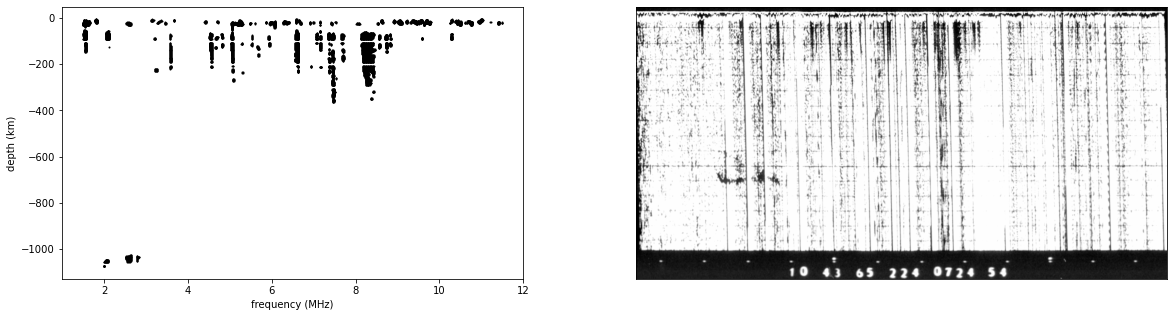

In [8]:
f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))

axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')

img = mpimg.imread(fn)
axs[1].imshow(img)
axs[1].set(xticks=[], yticks=[])

#  

(6961, 2)


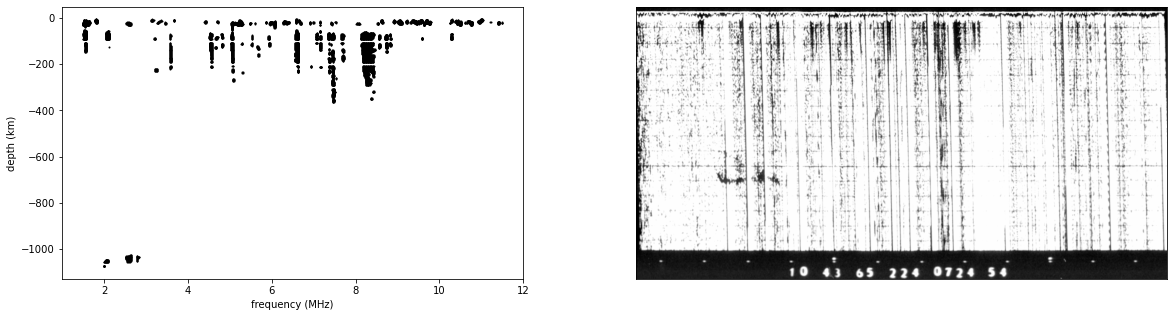

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/100.png


(13318, 2)


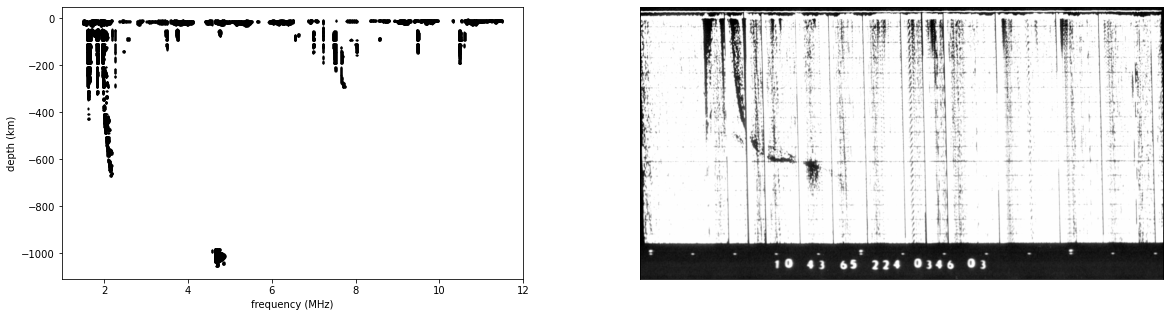

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/19.png


(16579, 2)


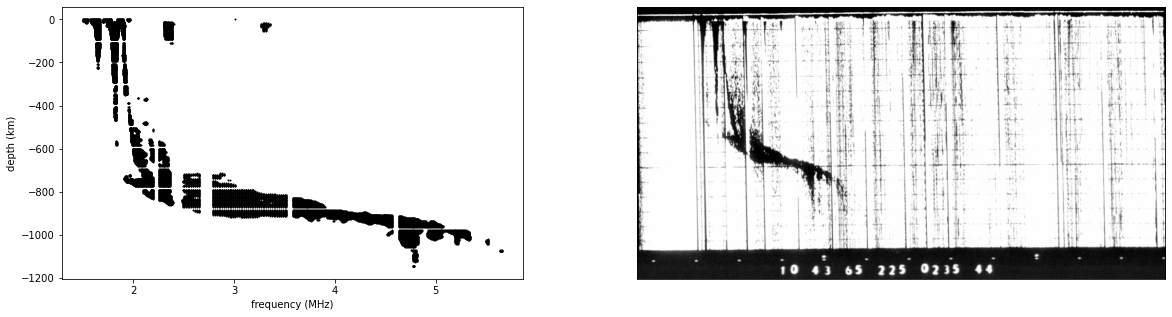

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/210.png


(51383, 2)


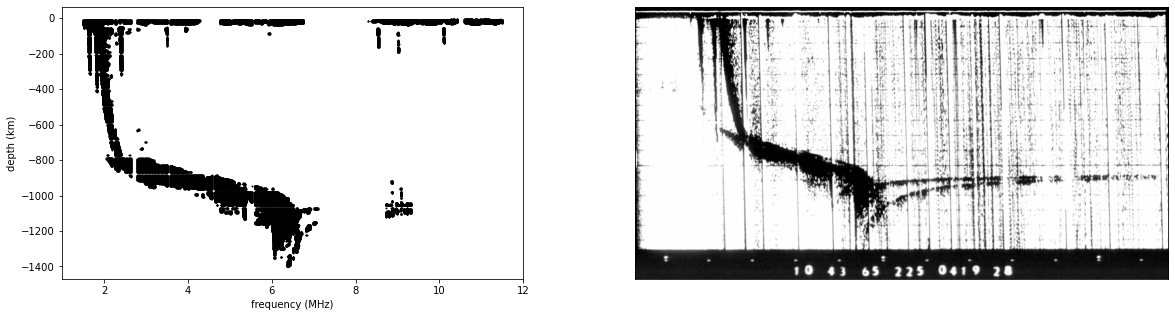

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/236.png


(16640, 2)


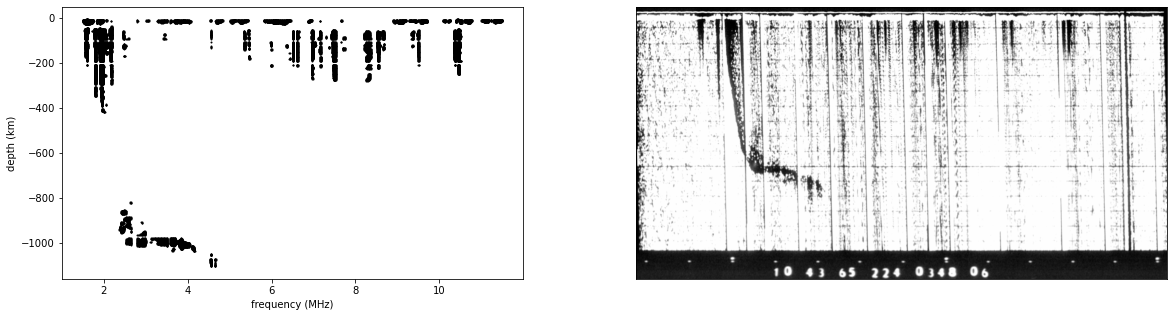

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/26.png


(25381, 2)


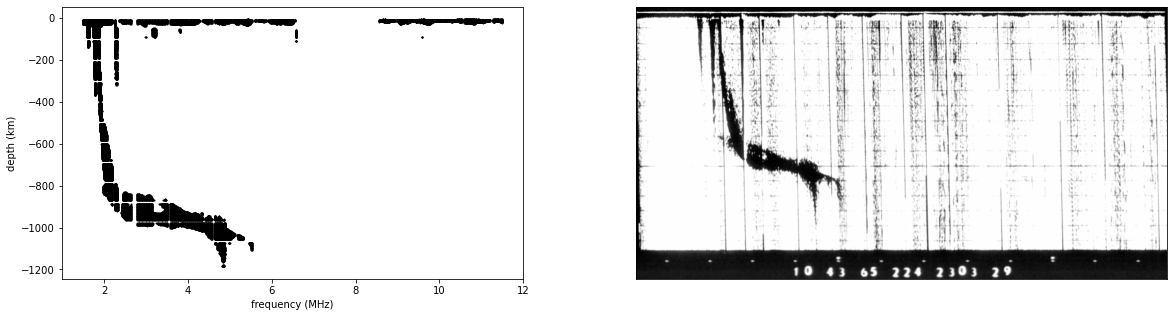

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/160.png


(46226, 2)


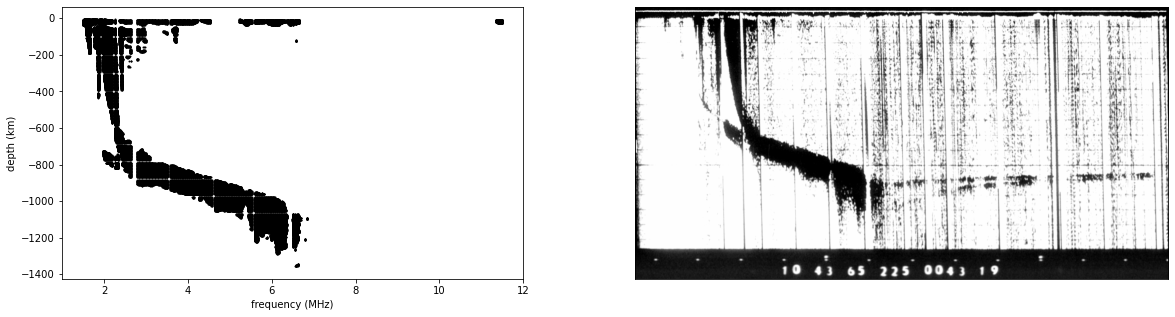

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/172.png


(19814, 2)


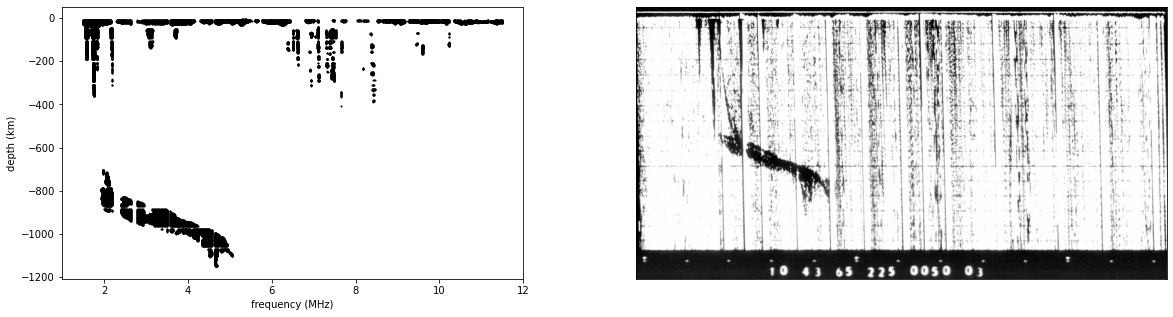

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/194.png


(20874, 2)


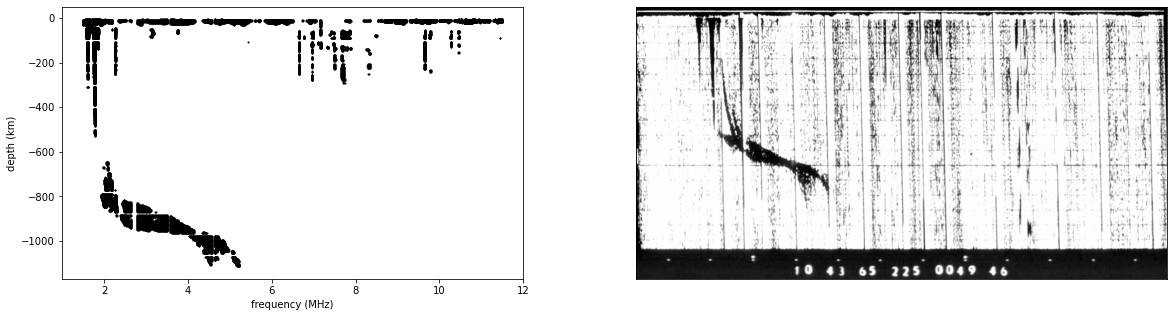

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/193.png


(40156, 2)


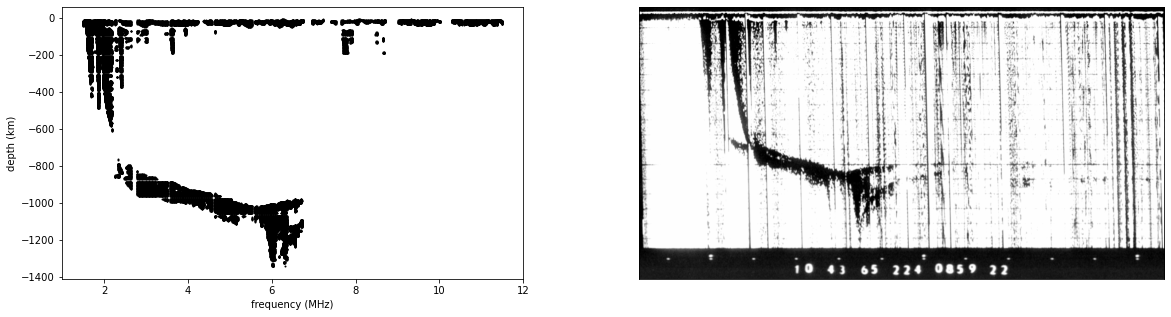

C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/01_intake/R014207844/2896-43B/110.png




In [9]:
for i in range(0, len(df_result)):
    fn = df_result['file_name'].iloc[i]
    fn = fn.replace('/', '\\')
    fn = fn.replace('\\', '/')
    fn2 = fn.replace(dataDir[:-10], '')
    fn_parts = fn2.split('/')
    
    arr_load = np.load(dataDir + 'mapped_coords-' + fn_parts[1] + '_' + fn_parts[2] + '_' + fn_parts[3] + '.npy')
    print(arr_load.shape)

    df_plot = pd.DataFrame({
    'f': arr_load[:, 0],
    'depth': arr_load[:, 1]
    })
    df_plot['depth_plot'] = -1*df_plot['depth']
    
    f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))
    axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
    axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')
    
    img = mpimg.imread(fn)
    axs[1].imshow(img)
    axs[1].set(xticks=[], yticks=[])
    
    plt.show()
    print(fn)
    print('')
    print('')